# Burgers' Equation

$$
u_t = - u \cdot u_x + \nu u_{xx}
$$
$$
u(x, 0) = \exp(- x^2 / 2)
$$

In [8]:
from rk_methods import *
from imex_methods import *
from measure import*
from order_estimate import *
from finite_difference import *
import matplotlib.pyplot as plt

nu = 1
ND = 200

def f_0(x):
    return np.exp(-x**2 / 2)

grid = DiscreteGrid([ND], [-4], [4])
grid_t = np.linspace(0, 1, ND)

y_0 = grid.discretize_function(f_0)
d_x = grid.derivative([1])
d_xx = grid.derivative([2])

In [9]:
def f(t, u):
    return - (d_x @ u) * u

def g(t, u):
    return nu * (d_xx @ u)

G = nu * d_xx
Tl = 0
Tr = 3

In [10]:
gamma = (3 + np.sqrt(3)) / 6

A = [[gamma, 0], [1 - 2 * gamma, gamma]]
b = [1/2, 1/2]
c = [gamma, 1 - gamma]
A_ = [[0, 0, 0], [gamma, 0, 0], [gamma - 1, 2*(1 - gamma), 0]]
b_ = [0, 1/2, 1/2]

In [11]:
N = 2**14
h_exact, t_exact, y_exact = IMEX(lambda t, u: f(t, u), LinearImplicitSolverLU(G), y_0, A, A_, b, b_, c, Tl, Tr, N)

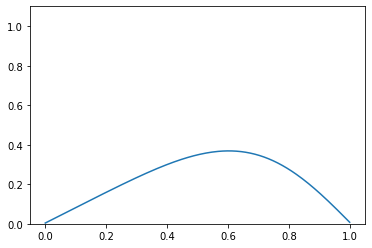

In [12]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

x = grid_t
fig, ax = plt.subplots()
line, = ax.plot(x, y_exact[0])
ax.set_ylim(0, 1.1)

def update(frame):
    line.set_ydata(y_exact[frame * 64])
    return line,

ani = FuncAnimation(fig, update, frames=N // 64, interval = 50, blit = True)

from IPython.display import HTML
HTML(ani.to_jshtml())

In [13]:
def linear_interpolation(l, r, y_l, y_r, x):
    assert l <= x and x <= r
    return ((r - x) * y_l + (x - l) * y_r) / (r - l)

# Approximation of the solution with a fine grid and linear interpolation
def f_exact(t):
    single_var = False
    if isinstance(t, float) or isinstance(t, int):
        t = [t]
        single_var = True
    result = np.zeros((np.shape(t)[0], np.shape(y_exact)[1]))
    for i in range(len(t)):
        j = max(0, int((t[i] - Tl) * (len(t_exact) - 1) / (Tr - Tl)))
        if j + 1 >= len(t_exact):
            result[i] = y_exact[-1]
        else:
            result[i] = linear_interpolation(t_exact[j], t_exact[j + 1], y_exact[j], y_exact[j + 1], t[i])
    if single_var:
        result = result.flatten()
    return result

In [14]:
table = create_mesasurement(f, g, A, A_, b, b_, c, Tl, Tr, f_exact, [0.01], G, [48, 2980], verbose=False)
# table = create_mesasurement_lin(f, g, G, A, A_, b, b_, c, Tl, Tr, f_exact, [0.01], [48, 2980], verbose=False)

from IPython.display import HTML, display
display(HTML(table))

/tmp/ipykernel_8741/1555299652.py:2: RuntimeWarning: overflow encountered in multiply
  return - (d_x @ u) * u
/tmp/ipykernel_8741/1555299652.py:2: RuntimeWarning: invalid value encountered in matmul
  return - (d_x @ u) * u
/tmp/ipykernel_8741/1555299652.py:5: RuntimeWarning: invalid value encountered in matmul
  return nu * (d_xx @ u)
